In [49]:
# Flag para configurar se plota ou não gráficos e tabelas com o matplotlib.

plot = 0

<a href="https://colab.research.google.com/github/AbraaoCG/PS-2025.1_tango/blob/main/Desafio_Analytica_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-Processamento

## Abrindo e estudando o arquivo

Começamos verificando a estrutura inicial do arquivo para identificar as colunas, seus valores, tamanho e estatísticas.

In [50]:
import pandas as pd
import csv

dataset = pd.read_csv('./campeonatos_futebol_atualizacao.csv', sep=',', encoding='utf-8', on_bad_lines='skip')

# visualizando primeiras linhas
dataset.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [51]:
# analisando o total de linhas e colunas
dataset.shape

(27716, 40)

In [52]:
# verificando total de registros não-nulos por coluna
dataset.count()

Chutes a gol 1         26204
Chutes a gol 2         26204
Impedimentos 1         24942
Impedimentos 2         24942
Escanteios 1           25388
Escanteios 2           25388
Chutes fora 1          25392
Chutes fora 2          25392
Faltas 1               25394
Faltas 2               25394
Cartões amarelos 1     27716
Cartões amarelos 2     27716
Cartões vermelhos 1    27716
Cartões vermelhos 2    27716
Cruzamentos 1           9015
Cruzamentos 2           9015
Laterais 1             15167
Laterais 2             15167
Chutes bloqueados 1     8843
Chutes bloqueados 2     8843
Contra-ataques 1        6263
Contra-ataques 2        6263
Gols 1                 27716
Gols 2                 27716
Tiro de meta 1         12015
Tiro de meta 2         12015
Tratamentos 1           5019
Tratamentos 2           5019
Substituições 1         9420
Substituições 2         9420
Tiros-livres 1          6246
Tiros-livres 2          6246
Defesas difíceis 1      6196
Defesas difíceis 2      6196
Posse 1(%)    

In [53]:
# checando informações gerais, incluindo tipo das colunas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

In [54]:
dataset.describe()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%)
count,26204.000000,26204.000000,24942.000000,24942.000000,25388.000000,25388.000000,25392.000000,25392.000000,25394.000000,25394.000000,...,5019.000000,5019.000000,9420.000000,9420.000000,6246.000000,6246.000000,6196.000000,6196.000000,25366.000000,25366.000000
mean,4.767287,3.854526,2.139844,1.968527,5.548409,4.459824,6.034302,4.956758,12.694495,12.946444,...,1.995617,2.134489,3.000318,3.001168,14.156260,14.245757,2.676888,3.206908,51.315659,48.508279
std,2.797705,2.444182,1.754924,1.681298,2.975521,2.620973,3.224260,5.451316,4.337402,4.608542,...,2.258323,2.296141,1.020285,1.033004,4.432963,4.335781,1.842689,2.078474,9.834217,9.808893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,10.000000,10.000000,...,0.000000,0.000000,3.000000,3.000000,11.000000,11.000000,1.000000,2.000000,45.000000,42.000000
50%,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,6.000000,5.000000,12.000000,13.000000,...,1.000000,2.000000,3.000000,3.000000,14.000000,14.000000,2.000000,3.000000,52.000000,48.000000
75%,6.000000,5.000000,3.000000,3.000000,7.000000,6.000000,8.000000,7.000000,15.000000,16.000000,...,3.000000,3.000000,3.000000,3.000000,17.000000,17.000000,4.000000,4.000000,58.000000,55.000000
max,90.000000,80.000000,23.000000,15.000000,22.000000,21.000000,23.000000,748.000000,46.000000,180.000000,...,17.000000,16.000000,6.000000,6.000000,36.000000,33.000000,11.000000,17.000000,100.000000,100.000000


## Verificação de Outliers

Usamos boxplot para verificar os outliers, isso é importante também para as substituições de valores nulos, já que usaremos tendências centrais para preenchimento de alguns dos nulos.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

if(plot):
  num_cols = len(dataset.select_dtypes(include=['number']).columns)
  num_rows = (num_cols + 1) // 2  # Calculate rows for subplots

  fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 3 * num_rows))
  axes = axes.flatten()
  change_index = False

  for i, col in enumerate(dataset.select_dtypes(include=['number']).columns):
    index = i
    if change_index:
      index = i - 1

    if col != 'resultado_code':  # Avoid plotting against itself
      sns.boxplot(x=col, data=dataset, ax=axes[index])
      #sns.scatterplot(data=dataset, x=dataset.index, y=col, hue='resultado_code', ax=axes[index])
      axes[index].set_title(f'Scatter Plot of {col} vs. Index')
    else:
      change_index=True

    # Hide any unused subplots
  for j in range(index+1, len(axes)):
      axes[j].set_visible(False)

  plt.tight_layout()
  plt.show()

Nossa análise apontou que algumas colunas possuem dados muito discrepantes, por isso, escolhemos removê-los pela técnica IQR. Optamos por usar como limiares as concentrações de 10% e 90% dos dados no cálculo do IQR, para não perdermos uma quantidade muito grande de dados.

In [56]:
# prompt: remove outlier from numeric columns using IQR

import pandas as pd
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.10)
    Q3 = df[column].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[((df[column] <= upper_bound) | (df[column].isna()))]
    return df_filtered

# Example usage (assuming 'dataset' is your DataFrame):
numeric_cols = dataset.select_dtypes(include=np.number).columns
for col in numeric_cols:
    dataset = remove_outliers_iqr(dataset, col)


Cerca de 3k linha foram removidas no processo.

In [57]:
dataset.shape

(24823, 40)

Após a remoção analisando o boxplot dos dados faltantes para verificar se a nova distribuição era satisfatória.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
if (plot):
  num_cols = len(dataset.select_dtypes(include=['number']).columns)
  num_rows = (num_cols + 1) // 2  # Calculate rows for subplots

  fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 3 * num_rows))
  axes = axes.flatten()
  change_index = False

  for i, col in enumerate(dataset.select_dtypes(include=['number']).columns):
    index = i
    if change_index:
      index = i - 1

    if col != 'resultado_code':  # Avoid plotting against itself
      sns.boxplot(x=col, data=dataset, ax=axes[index])
      #sns.scatterplot(data=dataset, x=dataset.index, y=col, hue='resultado_code', ax=axes[index])
      axes[index].set_title(f'Scatter Plot of {col} vs. Index')
    else:
      change_index=True

    # Hide any unused subplots
  for j in range(index+1, len(axes)):
      axes[j].set_visible(False)

  plt.tight_layout()
  plt.show()

## Verificação de nulos

In [59]:
# verificando quantidade de nulos em cada coluna
dataset.isnull().sum()

Chutes a gol 1          1394
Chutes a gol 2          1394
Impedimentos 1          2496
Impedimentos 2          2496
Escanteios 1            2097
Escanteios 2            2097
Chutes fora 1           2095
Chutes fora 2           2095
Faltas 1                2094
Faltas 2                2094
Cartões amarelos 1         0
Cartões amarelos 2         0
Cartões vermelhos 1        0
Cartões vermelhos 2        0
Cruzamentos 1          16882
Cruzamentos 2          16882
Laterais 1             11319
Laterais 2             11319
Chutes bloqueados 1    17019
Chutes bloqueados 2    17019
Contra-ataques 1       19313
Contra-ataques 2       19313
Gols 1                     0
Gols 2                     0
Tiro de meta 1         14078
Tiro de meta 2         14078
Tratamentos 1          20392
Tratamentos 2          20392
Substituições 1        16354
Substituições 2        16354
Tiros-livres 1         19174
Tiros-livres 2         19174
Defesas difíceis 1     19213
Defesas difíceis 2     19213
Posse 1(%)    

Foi verificado que há colunas completas (sem nulos) e colunas com mais de 80% de dados nulos (e.g. Tratamentos). Por isso, decidimos manter apenas as colunas que tivesse no mínimo 70% de dados não-nulos.

In [60]:
# removendo colunas com menos de 70% dados
dataset.dropna(axis='columns', thresh=round(dataset.shape[0]*0.7), inplace=True)

Efetuamos a análise da distribuição dos dados para verificar a melhor estratégia de preenchimente. Verificamos que a maioria segue a distribuição normal, então escolhemos a mediana como método de preenchimento dos valores nulos.

In [61]:
if(plot):
    num_cols = len(dataset.select_dtypes(include=['number']).columns)
    num_rows = (num_cols + 2) // 2

    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 2 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(dataset.select_dtypes(include=['number']).columns):
        try:
            sns.kdeplot(data=dataset, x=col, ax=axes[i], fill=True)
            axes[i].set_title(f'Density Plot of {col}')
        except Exception as e:
            print(f"Error plotting {col}: {e}")


    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


In [62]:
import numpy as np

#preenchendo os valores numéricos com suas médias
dataset.fillna(dataset.median(numeric_only=True), inplace=True)

In [63]:
# verificando os nulos restantes
dataset.isnull().sum()

Chutes a gol 1            0
Chutes a gol 2            0
Impedimentos 1            0
Impedimentos 2            0
Escanteios 1              0
Escanteios 2              0
Chutes fora 1             0
Chutes fora 2             0
Faltas 1                  0
Faltas 2                  0
Cartões amarelos 1        0
Cartões amarelos 2        0
Cartões vermelhos 1       0
Cartões vermelhos 2       0
Gols 1                    0
Gols 2                    0
Posse 1(%)                0
Posse 2(%)                0
Time 1                    0
Time 2                    0
Position 1             1430
Position 2             1456
dtype: int64

Como Position 1 e Position 2 são categóricos e possuem baixa quantidade de números nulos, optamos por preencher com a sua moda, ou seja, com os valores de maior ocorrência.

In [64]:
#preenchendo os valores numéricos com suas médias
dataset["Position 1"] = dataset["Position 1"].fillna(value=dataset["Position 1"].mode()[0])
dataset["Position 2"] = dataset["Position 2"].fillna(value=dataset["Position 2"].mode()[0])

In [65]:
dataset.isna().sum()

Chutes a gol 1         0
Chutes a gol 2         0
Impedimentos 1         0
Impedimentos 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Gols 1                 0
Gols 2                 0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
dtype: int64

## Criando coluna target

Como o objetivo é construir um preditor de vitória, adicionamos ao dataset uma coluna para representar o resultado final do jogo. Ela compara a colunas Gols 1 e Gols 2, definindo se o Time 1 ganhou (1) ou não (0).

In [66]:
dataset['Resultado Time 1'] = dataset.apply(lambda row: '1' if row['Gols 1'] > row['Gols 2'] else '0', axis=1)

## Codificação

Como a maioria dos modelos não trabalha bem com dados categóricos, verificamos os tipos dos dados e convertemos para códigos aqueles não eram numéricos.

In [67]:
dataset.dtypes

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Gols 1                 float64
Gols 2                 float64
Posse 1(%)             float64
Posse 2(%)             float64
Time 1                  object
Time 2                  object
Position 1              object
Position 2              object
Resultado Time 1        object
dtype: object

In [68]:
# convertendo dados categoricos para numericos

dataset["resultado_code"] = dataset["Resultado Time 1"].astype("category").cat.codes
dataset_copy = dataset.copy()

dataset["position_1_code"] = dataset["Position 1"].astype("category").cat.codes
dataset["position_2_code"] = dataset["Position 2"].astype("category").cat.codes
dataset["time_1_code"] = dataset["Time 1"].astype("category").cat.codes
dataset["time_2_code"] = dataset["Time 2"].astype("category").cat.codes

In [69]:
# removendo as colunas convertidas

dataset.drop(["Resultado Time 1","Position 1", "Position 2", "Time 1", "Time 2", "Gols 1", "Gols 2"], axis=1, inplace=True)

# Analisando correlação e EDA

### Pearson

A principio tentamos analisar a correlação linear dos dados, mas não encontramos correlação forte com a nossa target. Apesar disso, foi possível notar que as variáveis de Posse têm correlação forte entre si, o que era esperado intuitivamente. Isso significa que não precisamos considerar ambas no modelo.

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
if(plot):
    corr = dataset.corr(numeric_only=True)

    plt.figure(figsize=(36, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

### ANOVA

Com ANOVA, verificamos a correlação entre as duas classes targets "ganhou" e "perdeu", para garantir que não havia redudância. Essa análise compara todas as features das classes para identificar similaridades. Como o p-value de algumas das comparações foi maior que 0.05, pudemos notar uma possível similaridade em algumas features.

In [71]:
import seaborn as sn
from scipy.stats import f_oneway

features = [col for  _, col in enumerate(dataset.select_dtypes(include=['number']).columns)]
similarEmAlguma = False

for i in features:
  ganhou = dataset.loc[dataset['resultado_code'] == 1][i]
  perdeu = dataset.loc[dataset['resultado_code'] == 0][i]

  _, p_value = f_oneway(perdeu, ganhou)

  apresentaSimilaridade = p_value > 0.05
  if(apresentaSimilaridade):
    similarEmAlguma=True
    print("Apresentam similaridade em:", i, "| p-value:", p_value)


if(similarEmAlguma==False):
  print("Não apresentam similaridade")


Apresentam similaridade em: Escanteios 2 | p-value: 0.3166542529171838
Apresentam similaridade em: Chutes fora 2 | p-value: 0.07430119317834565
Apresentam similaridade em: position_1_code | p-value: 0.07511587321226791
Apresentam similaridade em: time_2_code | p-value: 0.2275817307271391


/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Para verificar as similaridades apontadas pelo ANOVA, plotamos a distribuição de todas as features das duas classes para uma análise visual das semelhanças. Notamos que no geral as duas classes são distribuídas de forma bem similar.

In [72]:
import matplotlib.pyplot as plt

if ( plot ):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    # Plot 1

    dataset.loc[dataset['resultado_code'] == 1].plot.hist(bins=30, alpha=0.5, ax=axes[0])
    axes[0].set_title('Distribuição Vitórias')

    # Plot 2
    dataset.loc[dataset['resultado_code'] == 0].plot.hist(bins=30, alpha=0.5, ax=axes[1])
    axes[1].set_title('Distribuição Derrotas e Empates')



Analisamos a feature de posição para verificar sua influência no resultado da partida. Os plots mostraram que não há diferencia significativa entre as posições usadas na derrota e na vitória. Apesar da posição 4-3-2-1 aparecer com predominância, ela é a mais jogada por ambos os times, aparecendo bastante na derrota e na vitória.

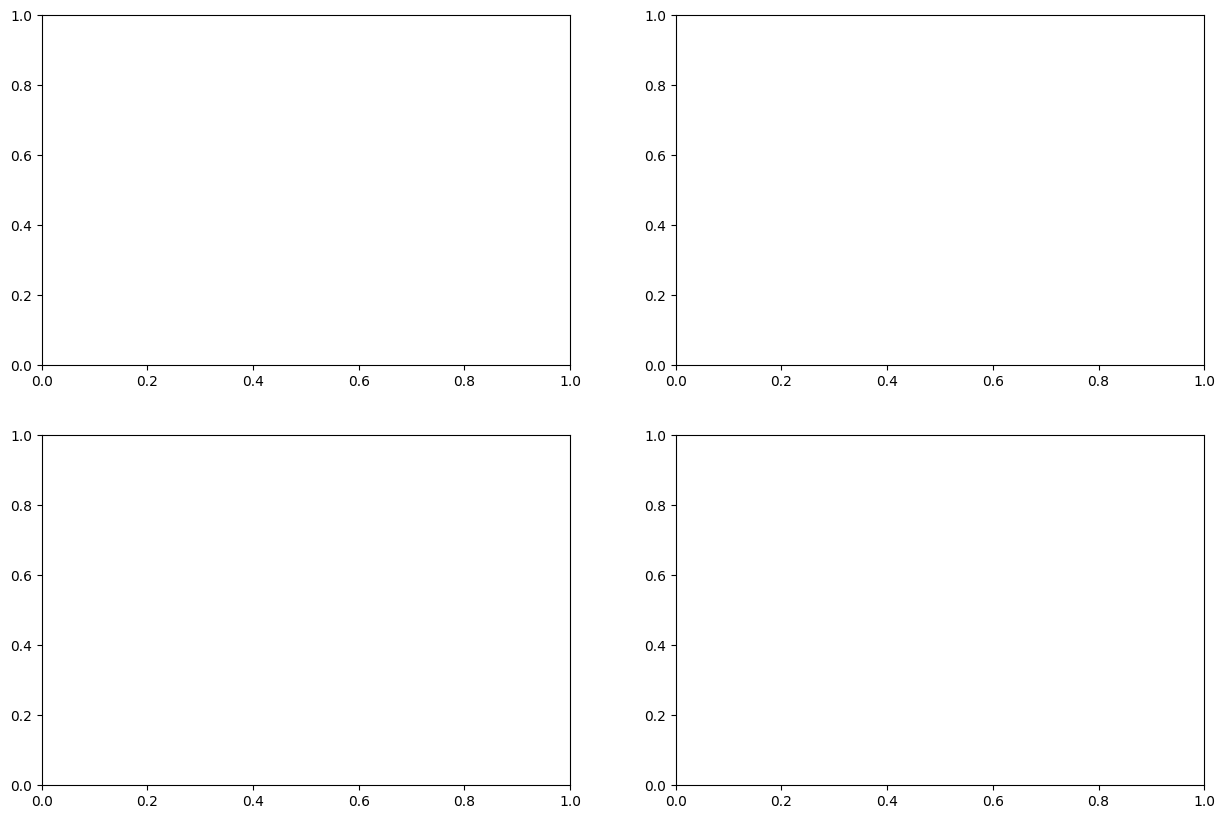

In [73]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
if ( plot ):

    # Plot 1
    dataset_copy.loc[dataset_copy['resultado_code'] == 0].groupby("Position 1").size().plot.bar(ax=axes[0,0])
    axes[0,0].set_title('Position 1 Distribution (resultado_code == 0)')

    # Plot 2
    dataset_copy.loc[dataset_copy['resultado_code'] == 1].groupby("Position 1").size().plot.bar(ax=axes[0,1])
    axes[0,1].set_title('Position 1 Distribution (resultado_code == 1)')

    # Plot 3
    dataset_copy.loc[dataset_copy['resultado_code'] == 0].groupby("Position 2").size().plot.bar(ax=axes[1,0])
    axes[1,0].set_title('Position 2 Distribution (resultado_code == 0)')

    #Plot 4
    dataset_copy.loc[dataset_copy['resultado_code'] == 1].groupby("Position 2").size().plot.bar(ax=axes[1,1])
    axes[1,1].set_title('Position 2 Distribution (resultado_code == 1)')

    plt.tight_layout()
    plt.show()


### Plot de cada feature com a target

Nesse plot de dispersão, pudemos ver quais features ajudam a separar melhor as duas classes. E podemos eliminar as que não trazem nenhuma separação.

In [74]:
if ( plot ):

  num_cols = len(dataset.select_dtypes(include=['number']).columns)
  num_rows = (num_cols + 1) // 2
  fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 3 * num_rows))
  axes = axes.flatten()
  change_index = False

  for i, col in enumerate(dataset.select_dtypes(include=['number']).columns):
    index = i
    if change_index:
      index = i - 1

    if col != 'resultado_code':
      sns.scatterplot(data=dataset, x=dataset.index, y=col, hue='resultado_code', ax=axes[index], alpha=0.3)
      axes[index].set_title(f'Scatter Plot of {col} vs. Index')
    else:
      change_index=True

  for j in range(index+1, len(axes)):
      axes[j].set_visible(False)

  plt.tight_layout()
  plt.show()


# Aplicando Random Forest

Antes de treinar o modelo, verificamos o balanceamento das classes. Observamos que há uma quantidade menor de vitórias. Para evitar que isso causasse um viés para não-vitórias, resolvemos balancear os dados efetuando uma diminuição nos dados excedentes para igualar com a quantidade da menor classe.

In [75]:
dataset.groupby('resultado_code').size()

resultado_code
0    13664
1    11159
dtype: int64

In [76]:
count_per_class = dataset.groupby('resultado_code').size()

#usa a menor classe como limitante
samples_threshold = min(count_per_class)

for classe, count in count_per_class.items():
    while count > samples_threshold:
        # Pega índices das linhas no grupo 'classe' até atingir o threshold
        exceding_samples = dataset[dataset['resultado_code'] == classe].sample(n=count - samples_threshold).index

        # Faça o drop das linhas excedentes
        dataset = dataset.drop(exceding_samples)

        # Atualize a contagem para o grupo 'classe'
        count = len(dataset[dataset['resultado_code'] == classe])

In [77]:
dataset.groupby('resultado_code').size()

resultado_code
0    11159
1    11159
dtype: int64

Como modelo de classificação escolhemos o RandomForest, pois funciona bem para a maioria dos casos de classificação binária. Antes de rodar o modelo, selecionamos as features de acordo com as análises anteriores.

In [78]:
features_redundantes = ["Posse 2(%)"] # definida por pearson
features_com_baixa_corr = ["Escanteios 2", "time_2_code"] # definida pela ANOVA
features_baixa_separacao = ["Cartões vermelhos 1", "Cartões vermelhos 2", "position_2_code"] # grafico de dispersao e histograma
target = ["resultado_code"]

colunas_eliminadas = features_redundantes + features_com_baixa_corr + features_baixa_separacao + target

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1, class_weight="balanced")

train=dataset.sample(frac=0.8,random_state=1)
X_train = train.drop(colunas_eliminadas, axis=1)
Y_train = train["resultado_code"]

test=dataset.drop(train.index)

rf.fit(X_train,Y_train)


RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       random_state=1)

In [80]:
preds = rf.predict(test.drop(colunas_eliminadas, axis=1))

### Avaliação da acurácia

Para melhor avaliar a acurácia do modelo, efetuamos testes de cross validation e calculamos a média das acurácias obtidas por cada execução.

In [81]:
from sklearn.model_selection import cross_val_score
import numpy as np

result_cross = cross_val_score(rf, X_train, Y_train, cv=10)

print("acurácia de cada fold: ", result_cross)
print("média das acurácias", np.mean(result_cross))

acurácia de cada fold:  [0.68365062 0.70268757 0.68868981 0.7043673  0.69187675 0.68235294
 0.71316527 0.68515406 0.71428571 0.69747899]
média das acurácias 0.6963709022242716


Usamos a matriz de confusão para analisar quais classes foram melhor preditas. Concluímos que ambas foram preditas de forma similar, sem viés para alguma em particular.

In [82]:
combined = pd.DataFrame(dict(actual=test["resultado_code"], prediction=preds))

pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,1565,640
1,704,1555
